In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

Calculate the cost function of y' = 3x + 2, where (x,y) = {(1,6),(2,10),(3,10),(5,15),(7,20)},

In [ ]:
l1 = [1,2,3,5,7]
l2 = [6,10,10,15,20]

In [ ]:
x = np.array(l1)
y = np.array(l2)

In [ ]:
x_mean = x.mean()
y_mean = y.mean()
x_sum = sum(x)
y_sum = sum(y)
xy_sum = sum(x*y)
x2_sum = sum(x ** 2)
y2_sum = sum(y ** 2)

m = (xy_sum - (y_mean * x_sum)) / \
    (x2_sum - (x_mean * x_sum)) #slope for the regression line

b = y_mean - m * x_mean #y-intercept of the data points
 
y_hat1 = m * x + b  #predicted data point.
y_hat2 = 3 * x + 2  #predicted data point for the given problem.

In [ ]:
print(f' value of m : {m} and value of b : {b}')

 value of m : 2.2155172413793105 and value of b : 4.224137931034481


In [ ]:
def rsqr(y, y_hat):
    """
        The determination coefficient (square of the correlation) 
        shows how much variance is explained by the other variable
        in between "x" and "y"
    """
    r = math.sqrt(sum((y_hat- y.mean())**2)\
                      /sum((y-y.mean())**2))
    R_sqr = r ** 2
    return R_sqr

# cost functons
def rmse(y,y_hat):
    """
    Finding the smallet set of distances.
    Square rooting the sum of grossly inflated the values.
    Root mean square error
    """
    var = ((y_hat - y)**2).sum()
    RMSE = math.sqrt(var/len(y))
    return RMSE

def mse(y, y_hat):
    """
    Mean Square Error
    """
    var = sum((y- y_hat)**2)
    MSE = var/len(y)
    return MSE

In [ ]:
cost_function1 = rmse(y, y_hat1)
cost_function1_1 = rmse(y, y_hat2)
cost_function2 = mse(y, y_hat1)
cost_function2_1 = mse(y, y_hat2)

In [ ]:
print(f'Root mean square error for y\' = 3x + 2 is : {cost_function1_1}')
print(f'Root mean square error for y\' = mx + b is : {cost_function1}')
print(f'Mean square error for y\' = 3x + 2 is : {cost_function2_1}')
print(f'Mean square error for y\' = mx + b is : {cost_function2}')

Root mean square error for y' = 3x + 2 is : 1.9493588689617927
Root mean square error for y' = mx + b is : 0.7645147209967176
Mean square error for y' = 3x + 2 is : 3.8
Mean square error for y' = mx + b is : 0.5844827586206889


In [ ]:
title_label1 = 'y\' = mx + b'
title_label2 = 'y\' = 3x + 2'

corelation1 = rsqr(y, y_hat1)
corelation2 = rsqr(y, y_hat2)

print(f'The determinant coefficient for y\' = mx + b is : {corelation1}')
print(f'The determinant coefficient for y\' = 3x + 2 is : {corelation2}')

The determinant coefficient for y' = mx + b is : 0.9749793339631554
The determinant coefficient for y' = 3x + 2 is : 1.8030821917808222


In [ ]:
def plot_graph(y, y_hat, title):
    residuals = y_hat - y

    fig = plt.figure()
    # plt.figure(figsize=(14,14))
    plt.scatter(x, y, marker='o', label='Y')
    plt.plot(x, y_hat, label='y\'', color='red') 
    plt.bar(x, residuals, width=0.9, label='residuals', color='green')
    plt.legend()
    plt.title(f'Linear Regression line for {title}')
    plt.xlabel('x')
    plt.ylabel('y')

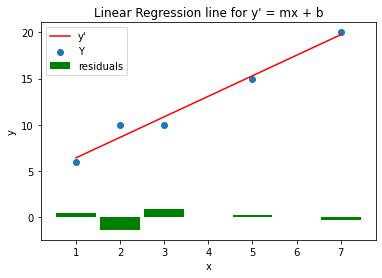

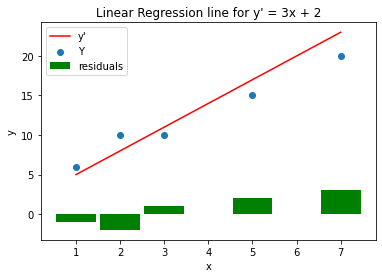

In [ ]:
plot_graph(y, y_hat1, title_label1)
plot_graph(y, y_hat2, title_label2)

In [ ]:
residuals1 = y_hat1 - y
residuals2 = y_hat2 - y

print(f'The residual values of the data point for y\' = mx + b is : {abs(residuals1), residuals1}')
print(f'The residual values of the data point for y\' = 3x + 2 is : {abs(residuals2), residuals2}')


The residual values of the data point for y' = mx + b is : (array([0.43965517, 1.34482759, 0.87068966, 0.30172414, 0.26724138]), array([ 0.43965517, -1.34482759,  0.87068966,  0.30172414, -0.26724138]))
The residual values of the data point for y' = 3x + 2 is : (array([1, 2, 1, 2, 3]), array([-1, -2,  1,  2,  3]))


In [ ]:
def gradient_descent(m,b,alpha):
    iterations = 100
    n = len(x)
    for _ in range(iterations):
        y_pred = m * x + b
        derivative_m = -(2/n) * sum(y * (y - y_pred))
        derivative_b = -(2/n) * sum(y - y_pred)
        m = m - alpha * derivative_m
        b = b - alpha * derivative_b
  
    print(f'Values - m : {m}, b : {b}, over {iterations} with learning rate(alpha) : {alpha}')
    y_pred = m * x + b

    r1 = rsqr(y, y_pred)
    print(f'The value of determinant coefficient r^2 is {r1}')

    r2 = rmse(y, y_pred)
    print(f'The value of root mean square error is {r2}')

    
    fig = plt.figure()
    ax1 = fig.add_subplot(111)    
    ax1.scatter(x,y,color ='blue', label='y', marker='o')
    ax1.plot([min(x), max(x)], [min(y_pred), max(y_pred)], label='y\'',color='red')
    plt.legend()
    plt.title('Linear Regression with Gradient Descent')
    plt.xlabel('x-values')
    plt.ylabel('y-values')
    ax2 = ax1.twinx()

Values - m : 2.2166256779638003, b : 4.224133911165291, over 100 with learning rate(alpha) : 1e-05
The value of determinant coefficient r^2 is 0.9759558343068617
The value of root mean square error is 0.7645288421456401
Values - m : 2.9719466699836525, b : 1.99890294329924, over 100 with learning rate(alpha) : 1e-05
The value of determinant coefficient r^2 is 1.7650069452980015
The value of root mean square error is 1.8674417547268816


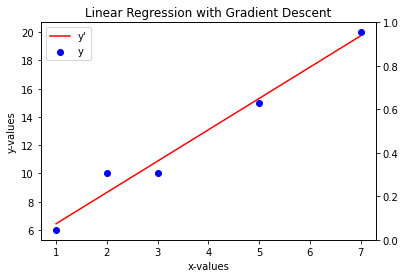

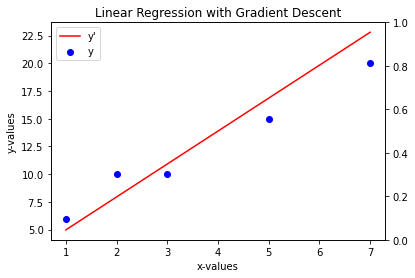

In [ ]:
gradient_descent(m,b,0.00001) #assuming slope and intercept with learning rate(alpha)
gradient_descent(3,2,0.00001) #taking slope and intercept as 3, 2 respectively with learning rate(alpha) 